<a href="https://colab.research.google.com/github/rbqpark/tinger/blob/main/ChordAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Chord Analysis Code Process**
1. Identify Chinese or English Song

2. Select correct comparison language:
```
if song == chinese:
      pd = playlist_english
if song == english:
      pd = palylist_chinese
```

3. Use function to generate another column, this new column calculates the difference between each chord (7 element list)

4. Apply the Sequence Matcher code to calculate the similarity score to the input and every song in the database

5. Get the max five and retrieve song titles (best matches)

6. Output (and create graphs)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import gspread
import pandas as pd
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gc = gspread.authorize(GoogleCredentials.get_application_default())

In [ ]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Path to CSV file. May need to change depending on user.
path = '/content/drive/MyDrive/Tinger/Documentation/'

,Song Title,Artist,Main Chord Progression
0,We Are Young,Fun,"1,6,4,5,1,6,4,5"
1,Save Your Tears,The Weeknd,"2,6,4,4,1,6,3,5"
2,Blinding Lights,The Weeknd,"2,6,1,5,2,6,1,5"
3,Rain on me,"Lady Gaga, Ariana Grande","1,5,6,5,1,6,5,1"
4,Intentions,Justin Bieber,"1,1,6,4,6,4,1,1"


In [ ]:
##convert CSV data to dataframe, keeping only the three important columns we need
english = pd.read_csv(path + 'Final Playlist Data (English).csv')
english = english[['Song Title', 'Artist', 'Main Chord Progression']]

##convert every entry of the "Main Chord Progression" column into a list of strings
chord_progressions = english['Main Chord Progression']
chord_list = chord_progressions.values.tolist()
chord_list

#convert the strings into individual lists, take the difference between each number on the list
#in order to find the intervals of the songs. These intervals, from a musical standpoint, will 
#be very useful in helping us identify which songs are most similar (ex: Major 7ths, Perfect 5ths)
empty_list = []
for value in chord_list:
    temp = list(map(int, value.split(',')))
    empty_list.append([j-i for i, j in zip(temp[:-1], temp[1:])])

english['Chord Difference'] = empty_list


#START THE SAME PROCESS BUT FOR CHINESE SONGS
#convert the mandarin songs to a dataframe
mandarin = pd.read_csv(path + 'Final Playlist Data (Mandarin).csv')
mandarin = mandarin[['Song Title', 'Artist', 'Main Chord Progression']]
mandarin.head()
##convert the series into a list of strings
chord_progressions = mandarin['Main Chord Progression']
chord_list_mandarin = chord_progressions.values.tolist()

#convert the strings into individual lists, take the difference between each number on the list
empty_list = []
for value in chord_list_mandarin:
    temp = list(map(int, value.split(',')))
    empty_list.append([j-i for i, j in zip(temp[:-1], temp[1:])])

mandarin['Chord Difference'] = empty_list

In [ ]:
#Sequence Matcher Function I will use to compare all lists to one another
from difflib import SequenceMatcher

def similar(a, b):
    return SequenceMatcher(None, a, b).ratio()

In [ ]:
#HERE IS WHERE WE PUT THE INPUT
#STITCHING ALL PIECES TOGETHER TO EXPORT THE 10 MOST SIMILAR SONGS AS A LIST
import re
input = 'Unpack Your Heart'
for x in input[0]:
    #retrieve chord progression and calculate the difference. then iterate through the entire column with the similar function
    if re.search(u'[\u4e00-\u9fff]', x):
      diff = mandarin.loc[mandarin['Song Title'] == input]['Chord Difference'].values[0]

      english['score'] = english['Chord Difference'].map(lambda y: similar(y, diff))

      english = english.sort_values('score', ascending = False)
      print(english[['score', 'Song Title']].values[:10])
    else:
      diff = english.loc[english['Song Title'] == input]['Chord Difference'].values[0]

      mandarin['score'] = mandarin['Chord Difference'].map(lambda y: similar(y, diff))

      mandarin = mandarin.sort_values('score', ascending = False)
      print(mandarin[['score', 'Song Title']].values[:10])

[[0.7142857142857143 '浪子回頭']
 [0.7142857142857143 '伟大的渺小']
 [0.7142857142857143 '手写的从前']
 [0.7142857142857143 '兜圈']
 [0.7142857142857143 '别叫我达芬奇']
 [0.7142857142857143 '大碗宽面']
 [0.7142857142857143 '小步舞曲']
 [0.7142857142857143 '莉莉安']
 [0.5714285714285714 '下雨的夜晚']
 [0.5714285714285714 '麻雀']]


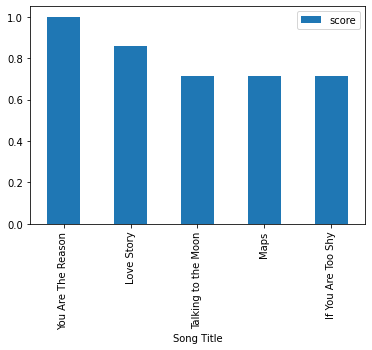

In [ ]:
## Test graphs
import re
#input = "We Don't Talk Anymore"
input = 'You Are The Reason'
for x in input[0]:
    #retrieve chord progression and calculate the difference. Iterate.
      diff = english.loc[english['Song Title'] == input]['Chord Difference'].values[0]
      english['score'] = english['Chord Difference'].map(lambda y: similar(y, diff))
      english = english.sort_values('score', ascending = False)
      for_graph = english[['score', 'Song Title']].head(5)
      for_graph.plot.bar(x='Song Title')

In [ ]:
import re
input = '因为你所以我'
for x in input[0]:
    #retrieve chord progression and calculate the difference. then iterate through the entire column with the similar function
      diff = mandarin.loc[mandarin['Song Title'] == input]['Chord Difference'].values[0]

      mandarin['score'] = mandarin['Chord Difference'].map(lambda y: similar(y, diff))

      mandarin = mandarin.sort_values('score', ascending = False)
      for_graph = mandarin[['score', 'Song Title']].head(10)
      for_graph.plot.bar()
      print(for_graph)

NameError: ignored